In [2]:
import numpy as np
import matplotlib.pyplot as plt

Slopes: 4.341728180633956e-09 5.958532349109857e-09
Constants: 5.403039513677812e-12 7.415062478892267e-12


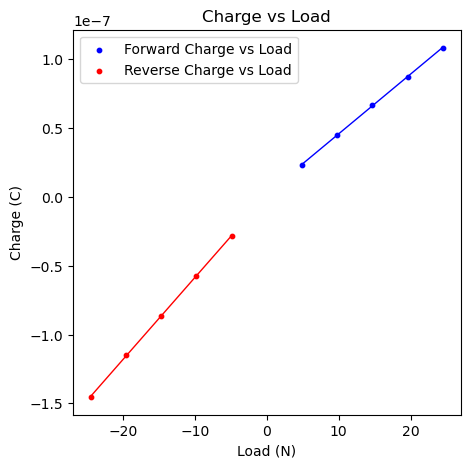

In [38]:
nl = [0.76 , 0.79 , 0.73 , 0.78, 0.76 , 0.83, 0.76 , 0.80, 0.76, 0.77 ]
#print(np.average(nl))
err = np.average(abs(nl-np.average(nl))/np.average(nl))
#print(err)

W = [ 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ]
F = np.array(9.8*(np.cumsum(W)))
#print(F,-F)

Vfwd1 = [ 1 , 0.94 , 0.92 , 0.87 , 0.9 ]
Vrev1 = [ 1.19 , 1.24 , 1.22 , 1.22 , 1.27 ]
Vfwd2 = [ 0.97 , 0.96 , 0.94 , 0.87 , 0.89 ]
Vrev2 = [ 1.24 , 1.24 , 1.24 , 1.25 , 1.33 ]
Vfwd = (np.array(Vfwd1) + np.array(Vfwd2))/2
Vrev = (np.array(Vrev1) + np.array(Vrev2))/2
#print(Vfwd, Vrev)
Vfcum= np.cumsum(Vfwd)
Vrcum = np.cumsum(Vrev)
#print(Vfcum, Vrcum)

qf = np.array((110*10**(-9))*(Vfcum)/4.7)
qr = np.array((110*10**(-9))*-(Vrcum)/4.7)
#print(qf,qr)

bff= np.polyfit(F, qf, 1)
bfr= np.polyfit(-F, qr, 1)
mf, cf = bff
mr, cr = bfr
print('Slopes:',mf, mr)

df = mf * ((28*10**(-6))*16*10**(-3))/(12*30*10**(-6))
dr = mr * ((28*10**(-6))*16*10**(-3))/(12*30*10**(-6))
print('Constants:',df, dr)


qf_fit = np.polyval(bff, F)
qr_fit = np.polyval(bfr, -F)
#print(qf_fit, qr_fit)


plt.figure(figsize=(5, 5))
plt.scatter(F, qf, label='Forward Charge vs Load', color='blue', marker='o', s=10)
plt.scatter(-F, qr, label='Reverse Charge vs Load', color='red', marker='o', s=10)
plt.plot(F, qf_fit, color='blue', linewidth=1)
plt.plot(-F, qr_fit, color='red', linewidth=1)
plt.xlabel('Load (N)')
plt.ylabel('Charge (C)')
plt.title('Charge vs Load')

plt.legend()
plt.show()

